# Latihan
Gunakan data titanic dari seaborn.  
* target=survived  
* fitur= 'pclass','sex','age','fare'  



* isi missing value  
* split data menjadi train dan test (80:20)
* bandingkan performa model berikut:
    * logistic regresi tanpa scaling
    * Logistic regresi dengan scaling
    * KNN tanpa scaling
    * KNN dengan scaling
    * Decision Tree


## Import Library

In [1]:
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import statsmodels.api as sm

## Dataset

In [2]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [75]:
titanic['age'].fillna(titanic['age'].mean(),
inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [76]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Dummy Variable

In [77]:
titanic_dummy=pd.get_dummies(titanic, drop_first=True) #yang pertama muncul akan dihilangkan
titanic_dummy

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.000000,1,0,7.2500,True,False,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,38.000000,1,0,71.2833,False,False,0,0,...,1,0,1,0,0,0,0,0,0,1
2,1,3,26.000000,0,0,7.9250,False,True,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1,1,35.000000,1,0,53.1000,False,False,0,0,...,1,0,1,0,0,0,0,0,1,1
4,0,3,35.000000,0,0,8.0500,True,True,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,True,1,0,...,0,0,0,0,0,0,0,0,1,0
887,1,1,19.000000,0,0,30.0000,False,True,0,0,...,1,1,0,0,0,0,0,0,1,1
888,0,3,29.699118,1,2,23.4500,False,False,0,0,...,1,0,0,0,0,0,0,0,1,0
889,1,1,26.000000,0,0,30.0000,True,True,1,0,...,0,0,1,0,0,0,0,0,0,1


In [78]:
titanic_dummy.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second',
       'class_Third', 'who_man', 'who_woman', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_yes'],
      dtype='object')

## Model

In [82]:
fitur=['pclass','sex_male','age','fare']
target='survived'

In [83]:
x=titanic_dummy[fitur]
y=titanic_dummy[target]

In [84]:
x.describe()

,pclass,sex_male,age,fare
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,32.204208
std,0.836071,0.477990,13.002015,49.693429
min,1.000000,0.000000,0.420000,0.000000
25%,2.000000,0.000000,22.000000,7.910400
50%,3.000000,1.000000,29.699118,14.454200
75%,3.000000,1.000000,35.000000,31.000000
max,3.000000,1.000000,80.000000,512.329200


### Validation

Train data= 80%

Test data= 20%

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    stratify=y, #membagi secara acak, ratio antar kelas di data train dan test sama
    test_size=0.2,
    random_state=2020
)

In [87]:
sm_logit=sm.Logit(y_train,sm.add_constant(x_train))
result_train=sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.448174
         Iterations 6


In [88]:
y_predict_proba=result_train.predict(sm.add_constant(x_test))
y_predict_proba

560    0.083861
130    0.075220
551    0.237366
587    0.237608
2      0.588478
         ...   
818    0.053649
113    0.640144
605    0.068876
642    0.777540
206    0.078701
Length: 179, dtype: float64

In [90]:
y_predict_class=np.where(y_predict_proba > .5,1,0) #1 selamat, 0 tidak selamat
y_predict_class

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0])

In [91]:
print('model accuracy score in test dataset:', accuracy_score(y_test, y_predict_class))

model accuracy score in test dataset: 0.7932960893854749


Akurasi 79.32%, artinya model yang kita buat mampu memprediksi secara tepat 8 dari 10 kali

## Logistic Regretion

**Without Scaling**

In [92]:
from sklearn.linear_model import LogisticRegression

In [43]:
Logreg= LogisticRegression ()
Logreg.fit(x_train, y_train)
y_predict=Logreg.predict(x_test)

In [44]:
print('Akurasi model Logistic Regresi di dataset test adalah:', accuracy_score(y_test,y_predict))

Akurasi model Logistic Regresi di dataset test adalah: 0.7932960893854749


**With Scaling**

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler= MinMaxScaler() #define transformer
scaler.fit(x_train) #fitting/training
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [52]:
x_train

,pclass,sex_male,age,fare
317,2,1,54.000000,14.0000
80,3,1,22.000000,9.0000
510,3,1,29.000000,7.7500
298,1,1,29.699118,30.5000
188,3,1,40.000000,15.5000
...,...,...,...,...
572,1,1,36.000000,26.3875
284,1,1,29.699118,26.0000
224,1,1,38.000000,90.0000
406,3,1,51.000000,7.7500


In [53]:
x_train_scaled

array([[0.5       , 1.        , 0.67328474, 0.02732618],
       [1.        , 1.        , 0.27117366, 0.01756683],
       [1.        , 1.        , 0.35913546, 0.01512699],
       ...,
       [0.        , 1.        , 0.4722292 , 0.1756683 ],
       [1.        , 1.        , 0.63558683, 0.01512699],
       [1.        , 0.        , 0.36792055, 0.13575256]])

In [54]:
Reg_Log= LogisticRegression() #define model
Reg_Log.fit(x_train_scaled, y_train) #fittinf/training
y_predict=Reg_Log.predict(x_test_scaled) #prediksi

In [62]:
print('Akurasi model Logistic Regresi di dataset test adalah:', accuracy_score(y_test,y_predict))

Akurasi model Logistic Regresi di dataset test adalah: 0.776536312849162


**Nilai akurasi menurun dari 79% menjadi 78% setelah menggunakan scaling**

## Choose Factor K

In [93]:
import matplotlib.pyplot as plt

In [105]:
k= range(1,40,2)
testing_score=[]
training_score=[]
score=0

for i in k:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    
    y_predict_train= knn.predict(x_train_scaled)
    training_score.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= knn.predict(x_test_scaled)
    acc_score=accuracy_score(y_test,y_predict_test)
    testing_score.append(acc_score)
    
    if score < acc_score:
        score=acc_score
        best_k=i

C:\Users\meidi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\meidi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\meidi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\meidi\anacond

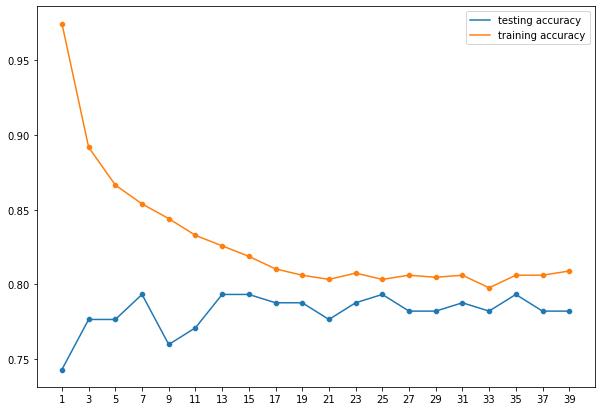

In [106]:
plt.figure(figsize=(10,7))
sns.lineplot(k,testing_score)
sns.scatterplot(k,testing_score)
sns.lineplot(k,training_score)
sns.scatterplot(k,training_score)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k)) #untuk mengatur angka di sumbu x
plt.show()

In [107]:
print('best k:', best_k)
print('best_score:', score)

best k: 7
best_score: 0.7932960893854749


## KKN

**Without Scaling**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn= KNeighborsClassifier(n_neighbors=7) #define model
knn.fit(x_train, y_train) #fittinf/training
y_predict=knn.predict(x_test) #prediksi

In [96]:
print('Akurasi model KNN di dataset test adalah:', accuracy_score(y_test,y_predict))

Akurasi model KNN di dataset test adalah: 0.6759776536312849


**With Scaling**

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler= MinMaxScaler() #define transformer
scaler.fit(x_train) #fitting/training
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [99]:
x_train

,pclass,sex_male,age,fare
317,2,1,54.000000,14.0000
80,3,1,22.000000,9.0000
510,3,1,29.000000,7.7500
298,1,1,29.699118,30.5000
188,3,1,40.000000,15.5000
...,...,...,...,...
572,1,1,36.000000,26.3875
284,1,1,29.699118,26.0000
224,1,1,38.000000,90.0000
406,3,1,51.000000,7.7500


In [100]:
x_train_scaled

array([[0.5       , 1.        , 0.67328474, 0.02732618],
       [1.        , 1.        , 0.27117366, 0.01756683],
       [1.        , 1.        , 0.35913546, 0.01512699],
       ...,
       [0.        , 1.        , 0.4722292 , 0.1756683 ],
       [1.        , 1.        , 0.63558683, 0.01512699],
       [1.        , 0.        , 0.36792055, 0.13575256]])

In [101]:
knn= KNeighborsClassifier(n_neighbors=7) #define model
knn.fit(x_train_scaled, y_train) #fittinf/training
y_predict=knn.predict(x_test_scaled) #prediksi

In [102]:
print('Akurasi model KNN di dataset test adalah:', accuracy_score(y_test,y_predict))

Akurasi model KNN di dataset test adalah: 0.7932960893854749


**Nilai akurasi meningkat dari 67% menjadi 79% setelah menggunakan scaling**

## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
tree= DecisionTreeClassifier(max_depth=2)
tree.fit(x_train,y_train)
y_predict=tree.predict(x_test)

In [72]:
print('Nilai akurasi model ini:', accuracy_score(y_test,y_predict))

Nilai akurasi model ini: 0.7430167597765364


In [73]:
from sklearn.tree import plot_tree

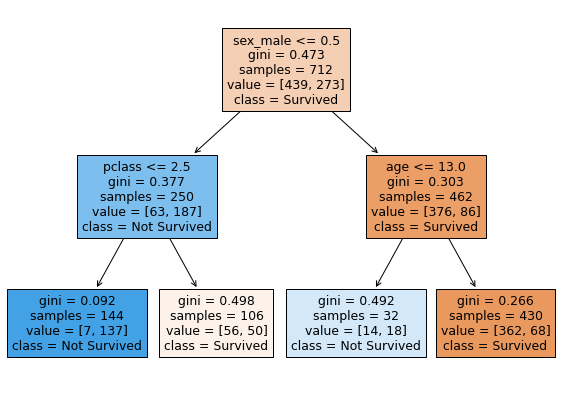

In [74]:
plt.figure(figsize=(10,7))
plot_tree(tree,feature_names= list(x),class_names=['Survived','Not Survived'], filled=True)
plt.show()

scaling **tidak** mempengaruhi performa dari decision tree, tapi bisa menyulitkan intepretasi decision tree.